# 01 – Data loading

Purpose:
- load raw data
- initial inspection
- basic cleaning



In [2]:
import pandas as pd
import geopandas as gpd

In [3]:


df = pd.read_csv("../data/crop_list.csv")

df.head()


,id,crop_en,crop_po,category
0,126,corn,milho,common
1,127,rice,arroz,common
2,128,sorghum,mapira,common
3,129,millet,mexoeira,common
4,130,large peanut,amendoim grande,common


In [4]:
df_1 = pd.read_csv("../data/gaza_fieldwork_crop_covers.csv")

df_1.head()

,id,formid,plotid,enumerator_id,gid,report_close_time,total_crop_cover,crop_po,crop_cover_percentage
0,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,feijões,30
1,820,20,9624988,1,18418,2025-04-10 12:06:32.653,80,milho,50
2,821,20,12364565,2,9045,2025-04-10 12:06:45.057,100,trigo,100
3,821,20,12364565,2,9058,2025-04-10 12:06:45.057,100,batata doce de polpa alaranjada,100
4,821,20,12364565,2,9065,2025-04-10 12:06:45.057,100,feijões,100


In [8]:
gdf_sam = gpd.read_file("../data/shapefiles/moz_sampling_areas.shp")

gdf_sam.head()

,plotid,optional,prov,stratum,fcname,geometry
0,10084432.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((503500.000 7216000.000, 503500.000 7..."
1,12014580.0,1,Gaza,scarce alluvial,scarce,"POLYGON ((600000.000 7290000.000, 600000.000 7..."
2,10264592.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((512500.000 7296000.000, 512500.000 7..."
3,7015055.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((350000.000 7527500.000, 350000.000 7..."
4,9884543.0,0,Gaza,scarce alluvial,scarce,"POLYGON ((493500.000 7271500.000, 493500.000 7..."


In [10]:
print(gdf_sam.columns)

Index(['plotid', 'optional', 'prov', 'stratum', 'fcname', 'geometry'], dtype='object')


In [11]:
print(gdf_sam["fcname"].unique())

['scarce' 'regular' 'irrigated']


In [12]:
print(gdf_sam["optional"].unique())

[0 1 2]


In [13]:
gdf_seg = gpd.read_file("../data/shapefiles/moz_segments.shp")

gdf_seg.head()

,gid,id,plotid,landform_e,landform_p,farming_ty,farming__1,profile,optional,cuo_class_,cuo_clas_1,segment_cl,segment__1,code,tasked,district,areasize_w,geometry
0,24063,23663,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,open woodland,floresta aberta,205,NaN,Bilene,0.0,"POLYGON ((534750.000 7248011.259, 534750.000 7..."
1,24017,23625,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535235.705 7247274.049, 535236.340 7..."
2,24016,23624,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,cultivated,terra cultivada,agricultural field,campo agrícola,301,NaN,Bilene,0.0,"POLYGON ((535452.472 7248230.195, 535463.051 7..."
3,24011,23621,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535692.434 7247897.073, 535710.954 7..."
4,24009,23619,10714495,pediplain,pediplano,regular,regular,10 early pedi,1,uncultivated,terra no cultivada,other,outro,208,NaN,Bilene,0.0,"POLYGON ((535596.353 7248121.187, 535590.474 7..."


In [14]:
print(gdf_seg.columns)

Index(['gid', 'id', 'plotid', 'landform_e', 'landform_p', 'farming_ty',
       'farming__1', 'profile', 'optional', 'cuo_class_', 'cuo_clas_1',
       'segment_cl', 'segment__1', 'code', 'tasked', 'district', 'areasize_w',
       'geometry'],
      dtype='object')


In [15]:
for col in gdf_seg.columns:
    print(col)
    print(gdf_seg[col].unique())
    print("------")


gid
[24063 24017 24016 ... 18082 18031 18088]
------
id
[23663 23625 23624 ... 17729 17731 17736]
------
plotid
[10714495 10474489 10944477 12034499 12194524 11614572 10294521 10294468
 12734545 11004454 11104448  7644979 10824574 10784529 11164473  8234973
 10734673  9534651  8514772  9024738 10244478  8734827 11184541  9504638
 10084432 10694677 10884738 10484564 10784479 11034460 11034521  9884543
  9864618 11514703  9754786 10624485  9594616 11784584 10354511  8744647
  8205137 10274416  8164864 11074511 10734683  9185144 10314505 10154468
  6994897 10734525 10204588 10894432  9715241  6975045 11054454 11184525
 11384487  8634655 11774475 10264438  7744825 10764446  7275020  9134725
 11434481 12014580  7035055 11114719  9624988 10325175  8354714 11024497
 10244521  8504703 11944595 10564416 11104444 10974726 11774738 11794734
 11444651  7894767 10374458 12034495 11074550  9495244 11094515  7015055
 10684677 10314574  9555059 10584515 10294501 10624511 11324527 10624422
  7784866  8

In [18]:
gdf_stra = gpd.read_file("../data/shapefiles/moz_strata.shp")

gdf_stra.head()

,id,province_i,province,cluster,stratum,fcname,landform,geometry
0,41,2,Gaza,q03a,5 late pedi,regular,pediplain,"MULTIPOLYGON (((521420.020 7201748.950, 521372..."
1,42,2,Gaza,q03b,8 late pedi,regular,pediplain,"MULTIPOLYGON (((521429.520 7202601.430, 521564..."
2,44,2,Gaza,q03c,11 late pedi,regular,pediplain,"MULTIPOLYGON (((525552.176 7211794.603, 525634..."
3,45,2,Gaza,q19,12 late pedi,regular,pediplain,"MULTIPOLYGON (((524569.020 7212062.670, 524569..."
4,54,2,Gaza,q16a,7 early pedi,regular,pediplain,"MULTIPOLYGON (((507665.229 7247408.124, 506763..."


In [19]:
print(gdf_seg.geom_type.unique())


['Polygon']


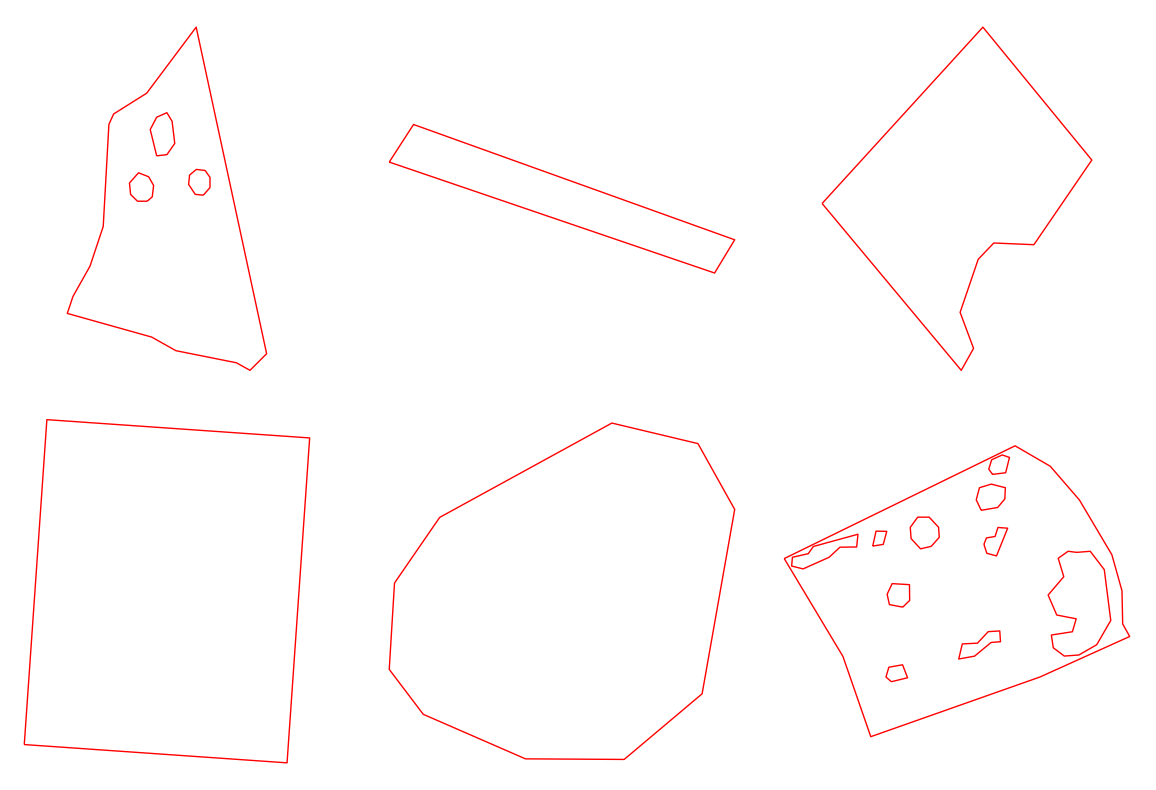

In [20]:
import matplotlib.pyplot as plt

# sample 6 random polygons
sampled = gdf_seg.sample(6)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for ax, (_, row) in zip(axes.flatten(), sampled.iterrows()):
    gdf_seg.iloc[[row.name]].plot(
        ax=ax,
        facecolor="none",
        edgecolor="red"
    )
    ax.set_axis_off()

plt.tight_layout()
plt.show()


In [21]:
gdf_seg[gdf_seg["plotid"].isin(gdf_sam["plotid"])].groupby("plotid").size()


plotid
6975045       2
6994897       3
7015055     132
7035055      16
7155097     241
           ... 
12194485    942
12194524     96
12204477    154
12364565    212
12734545      9
Length: 149, dtype: int64

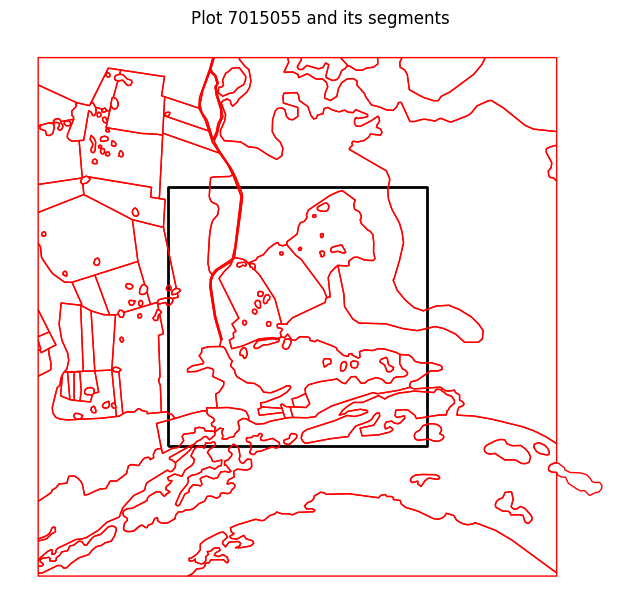

In [22]:
import matplotlib.pyplot as plt

#lot_id = gdf_sam["plotid"].iloc[1]
plot_id= 7015055                                         
sam_plot = gdf_sam[gdf_sam["plotid"] == plot_id]
seg_plot = gdf_seg[gdf_seg["plotid"] == plot_id]


fig, ax = plt.subplots(figsize=(8, 8))

# plot main plot polygon
sam_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=2,
    label="Plot"
)

# plot segments inside
seg_plot.plot(
    ax=ax,
    facecolor="none",
    edgecolor="red",
    linewidth=1,
    label="Segments"
)

ax.set_title(f"Plot {plot_id} and its segments")
ax.set_axis_off()

plt.show()


In [34]:
gdf_gz = gdf_seg[gdf_seg["gid"].isin(df_1["gid"])].copy()
print("segments_ids:", gdf_gz["gid"].nunique())
print("sampling area_ids:", gdf_gz["plotid"].nunique())


segments_ids: 1071
sampling area_ids: 46


In [33]:
gdf_gz.head()

,gid,id,plotid,landform_e,landform_p,farming_ty,farming__1,profile,optional,cuo_class_,cuo_clas_1,segment_cl,segment__1,code,tasked,district,areasize_w,geometry
596,18178,17823,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,152.986671,"POLYGON ((546509.027 7238486.318, 546514.338 7..."
603,18170,17816,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,uncultivated,terra no cultivada,open woodland,floresta aberta,205,2.0,Xai-Xai,8922.510025,"POLYGON ((546884.485 7238949.864, 546889.606 7..."
608,18161,17813,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,4960.516669,"POLYGON ((546773.043 7238759.732, 546779.161 7..."
638,618,297,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,2.0,Xai-Xai,1.368582,"POLYGON ((546977.894 7238448.186, 546982.364 7..."
666,544,228,10944477,pediplain,pediplano,regular,regular,10 early pedi,0,cultivated,terra cultivada,agricultural field,campo agrícola,301,3.0,Xai-Xai,862.446178,"POLYGON ((546890.909 7238729.339, 546901.175 7..."


In [35]:
import pandas as pd

relations = pd.DataFrame({
    "rows": [
        len(gdf_gz),
        gdf_gz["plotid"].nunique(),
        gdf_gz["id"].nunique(),
        gdf_gz["gid"].nunique()
    ]
}, index=[
    "total rows",
    "unique plotid",
    "unique id",
    "unique gid"
])

print(relations)


               rows
total rows     1071
unique plotid    46
unique id      1071
unique gid     1071


In [37]:
relations_df1 = pd.DataFrame({
    "rows": [
        len(df_1),
        df_1["plotid"].nunique(),
        df_1["id"].nunique(),
        df_1["gid"].nunique()
    ]
}, index=[
    "total rows",
    "unique plotid",
    "unique id",
    "unique gid"
])

print(relations_df1)


               rows
total rows     1837
unique plotid    46
unique id       127
unique gid     1071


In [64]:
import numpy as np


cp = df_1.merge(
    gdf_gz[["gid", "plotid", "areasize_w", "optional"]],
    on="gid",
    how="left"
)

cp["crop_cover"] = np.where(
    cp["optional"].isin([0, 2]),
    cp["areasize_w"] * (cp["total_crop_cover"] / 100) * (cp["crop_cover_percentage"] / 100),
    0
)
print(cp.head())

    id  formid  plotid_x  enumerator_id    gid        report_close_time  \
0  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
1  820      20   9624988              1  18418  2025-04-10 12:06:32.653   
2  821      20  12364565              2   9045  2025-04-10 12:06:45.057   
3  821      20  12364565              2   9058  2025-04-10 12:06:45.057   
4  821      20  12364565              2   9065  2025-04-10 12:06:45.057   

   total_crop_cover                          crop_po  crop_cover_percentage  \
0                80                          feijões                     30   
1                80                            milho                     50   
2               100                            trigo                    100   
3               100  batata doce de polpa alaranjada                    100   
4               100                          feijões                    100   

   plotid_y    areasize_w  optional   crop_cover  
0   9624988  11374.8136

In [62]:
cp["crop_cover"].describe()


count     1837.000000
mean      1251.963897
std       3036.985986
min          0.000000
25%         83.529160
50%        398.191309
75%       1131.205972
max      62272.796734
Name: crop_cover, dtype: float64